In [151]:
import requests
import pandas as pd
import yfinance as yf
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import matplotlib.pyplot as plt


## (1) Web Scrapping ibovespa website

In [3]:
# In order to get the last chromedriver version we use .install method
# Inicialize ChromeDriver 
driver = webdriver.Chrome(service = ChromeService(ChromeDriverManager().install()))
url = 'https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm'
driver.get(url)

In [4]:
# Find "id = bvmf_iframe"
driver.find_element(By.ID, "bvmf_iframe")

<selenium.webdriver.remote.webelement.WebElement (session="9cd00ae0901ea497c73275b11f26730c", element="f.AB2438629F8419C421468332E5211954.d.3CD7C3C4896579FCB662882EF76BE14F.e.29")>

In [5]:
# Wait the page to finishy loading the content
iframe = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "bvmf_iframe"))
)

# Change the context
driver.switch_to.frame(iframe)

In [6]:
# Wait for the overlay to disappear before clicking the download button
WebDriverWait(driver, 10).until(
    EC.invisibility_of_element_located((By.CLASS_NAME, "ot-sdk-row"))
)

# Finding the buttom "download"
download = driver.find_element(By.XPATH, "/html/body/app-root/app-day-portfolio/div/div/div[1]/form/div[2]/div/div[2]/div/div/div[1]/div[2]/p/a")


In [7]:
#
driver.execute_script("arguments[0].scrollIntoView(true);", download)
download.click()

## (2) Colect and transform stocks data

In [75]:
# Load ibov excel file
# Fix file: transform into xlsx with python
df_ibov = pd.read_excel("C:/Users/yohan/Downloads/IBOVDia_02-12-24.xlsx", skiprows=[0,88,89])
display(df_ibov.head())
display(df_ibov.tail())

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ALOS3,ALLOS,ON NM,502481592,0.479
1,ALPA4,ALPARGATAS,PN N1,166460180,0.051
2,ABEV3,AMBEV S/A,ON,4394835131,2.710
3,ASAI3,ASSAI,ON NM,1349687675,0.431
4,AURE3,AUREN,ON NM,291727616,0.139


,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
81,VAMO3,VAMOS,ON EJ NM,485166826,0.131
82,VBBR3,VIBRA,ON NM,1023392529,1.022
83,VIVA3,VIVARA S.A.,ON NM,125823025,0.140
84,WEGE3,WEG,ON NM,1269032828,3.315
85,YDUQ3,YDUQS PART,ON NM,290010465,0.130


In [76]:
# Tickers list
tickers = list(df_ibov["Código"].unique())

# Adding ".SA" at the end
for i in range(len(tickers)):
    tickers[i] = tickers[i][:] + ".SA"

# View
print(tickers)

# Get historical data
raw_data = yf.download(tickers, start="2014-01-01", end="2024-01-01")

# View
display(raw_data.head())
display(raw_data.tail())


['ALOS3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZUL4.SA', 'AZZA3.SA', 'B3SA3.SA', 'BBSE3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRAV3.SA', 'BRFS3.SA', 'BPAC11.SA', 'CXSE3.SA', 'CRFB3.SA', 'CCRO3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'NTCO3.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ISAE4.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'RENT3.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'RECV3.SA', 'PRIO3.SA', 'PETZ3.SA', 'RADL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SANB11.SA', 'STBP3.SA', 'SMTO3.SA', 'CSNA3.SA', 'SLCE3.SA', 'SUZB3.SA', 'TAEE11.SA', 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VAMO3.SA', 'VBBR3.SA

[*********************100%%**********************]  86 of 86 completed

2 Failed downloads:
['ISAE4.SA', 'BRAV3.SA']: YFChartError("%ticker%: Data doesn't exist for startDate = 1388541600, endDate = 1704078000")


Price       Adj Close                                                \
Ticker       ABEV3.SA ALOS3.SA  ALPA4.SA ASAI3.SA AURE3.SA AZUL4.SA   
Date                                                                  
2014-01-02  11.417548      NaN  8.327160      NaN      NaN      NaN   
2014-01-03  11.174621      NaN  8.237943      NaN      NaN      NaN   
2014-01-06  11.030178      NaN  8.118984      NaN      NaN      NaN   
2014-01-07  11.378151      NaN  7.875117      NaN      NaN      NaN   
2014-01-08  11.489766      NaN  7.887012      NaN      NaN      NaN   

Price                                                ...   Volume            \
Ticker       AZZA3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  ... TOTS3.SA  UGPA3.SA   
Date                                                 ...                      
2014-01-02  23.325058  2.346949  6.059425  7.496918  ...  1588799   4658305   
2014-01-03  24.013338  2.369133  6.122545  7.328737  ...   545067  11029561   
2014-01-06  23.653908  2.309239  6.031656  7.378399  ...  1110020   6514508   
2014-01-07  22.690311  2.287056  5.928137  7.238868  ...   798768   5774371   
2014-01-08  22.017326  2.340296  5.809474  7.217583  ...  1775610   4363118   

Price                                                                       \
Ticker      USIM5.SA VALE3.SA VAMO3.SA VBBR3.SA VIVA3.SA VIVT3.SA WEGE3.SA   
Date                                                                         
2014-01-02   7429100  4395300      NaN      NaN      NaN    26200  1705548   
2014-01-03  18385800  9207100      NaN      NaN      NaN    38700  4189848   
2014-01-06   5677900  4527200      NaN      NaN      NaN     6200  2741180   
2014-01-07   5058700  4352500      NaN      NaN      NaN    26600  3304964   
2014-01-08   4664100  2697700      NaN      NaN      NaN    32600  4343976   

Price                
Ticker     YDUQ3.SA  
Date                 
2014-01-02  2474500  
2014-01-03  8302300  
2014-01-06  2633000  
2014-01-07  1673000  
2014-01-08  1978000  

[5 rows x 516 columns]

Price      Adj Close                                                     \
Ticker      ABEV3.SA   ALOS3.SA ALPA4.SA ASAI3.SA   AURE3.SA   AZUL4.SA   
Date                                                                      
2023-12-21     13.70  24.955685     9.13    13.24  12.915058  16.410000   
2023-12-22     13.71  24.768047     9.50    13.41  12.915058  16.299999   
2023-12-26     13.77  24.983829     9.75    13.37  12.905370  16.260000   
2023-12-27     13.84  25.011976    10.12    13.48  12.973191  16.570000   
2023-12-28     13.73  24.908775    10.12    13.53  12.895681  16.010000   

Price                                                   ...   Volume           \
Ticker       AZZA3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA  ... TOTS3.SA UGPA3.SA   
Date                                                    ...                     
2023-12-21  65.494415  14.015466  25.221361  14.356383  ...  3251200  5556100   
2023-12-22  65.979485  14.034811  25.291044  14.139359  ...  2187000  3788600   
2023-12-26  65.731995  14.179897  25.523331  14.195729  ...  1542500  3141600   
2023-12-27  65.959679  14.102517  25.486166  14.299072  ...  1833100  3593600   
2023-12-28  63.880806  14.073501  25.732384  14.355444  ...  2839400  3931100   

Price                                                                      \
Ticker      USIM5.SA  VALE3.SA    VAMO3.SA   VBBR3.SA   VIVA3.SA VIVT3.SA   
Date                                                                        
2023-12-21  16479900  24202600   3351500.0  9683700.0  1884000.0  1259800   
2023-12-22  11045200  26277000  62444400.0  8153700.0  2629800.0  1102500   
2023-12-26   5271400  12149500   3406300.0  5603900.0   936100.0   698500   
2023-12-27   4396600  13821200   3289400.0  4729600.0  1653400.0  1723200   
2023-12-28   7530100  16545800  16865200.0  8224200.0  3350400.0  1377500   

Price                         
Ticker     WEGE3.SA YDUQ3.SA  
Date                          
2023-12-21  4939500  1685000  
2023-12-22  4733200  2333200  
2023-12-26  3173100  1282100  
2023-12-27  2730800  2328900  
2023-12-28  3536300  1983800  

[5 rows x 516 columns]

In [77]:
# Create a copy, transpose the data and transform index in columns
data = raw_data.copy()
data = data.T.reset_index(names=["Price", "Ticker"])
display("Primeira View: ",data.head())

# Transform all columns in a single column called "Date"
data = data.melt(id_vars=["Ticker", "Price"], var_name="Date")
display("Segunda View: ",data.head())

# Create columns for each category inside "Price"
data = data.pivot(index=['Ticker','Date'], columns='Price', values='value')
data = data.rename_axis(columns=None).reset_index()
data = data.sort_values(by=["Ticker","Date"])
display("Terceira View: ", data.head())
print(data.info())


'Primeira View: '

Date,Price,Ticker,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,2014-01-13 00:00:00,...,2023-12-14 00:00:00,2023-12-15 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00
0,Adj Close,ABEV3.SA,11.417548,11.174621,11.030178,11.378151,11.489766,11.220576,11.292802,11.187749,...,13.779736,13.751225,13.827251,13.969800,13.740000,13.700000,13.710000,13.770000,13.840000,13.730000
1,Adj Close,ALOS3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.180849,25.171467,25.021358,24.805574,24.345867,24.955685,24.768047,24.983829,25.011976,24.908775
2,Adj Close,ALPA4.SA,8.327160,8.237943,8.118984,7.875117,7.887012,7.672886,7.643147,7.547978,...,9.180000,8.960000,9.530000,9.440000,9.340000,9.130000,9.500000,9.750000,10.120000,10.120000
3,Adj Close,ASAI3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.360000,12.870000,13.210000,13.400000,13.360000,13.240000,13.410000,13.370000,13.480000,13.530000
4,Adj Close,AURE3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.031322,13.070078,12.934436,12.953814,12.973191,12.915058,12.915058,12.905370,12.973191,12.895681


'Segunda View: '

,Ticker,Price,Date,value
0,ABEV3.SA,Adj Close,2014-01-02 00:00:00,11.417548
1,ALOS3.SA,Adj Close,2014-01-02 00:00:00,NaN
2,ALPA4.SA,Adj Close,2014-01-02 00:00:00,8.327160
3,ASAI3.SA,Adj Close,2014-01-02 00:00:00,NaN
4,AURE3.SA,Adj Close,2014-01-02 00:00:00,NaN


'Terceira View: '

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume
0,ABEV3.SA,2014-01-02,11.417548,17.388399,17.498390,17.178419,17.298409,8036139.0
1,ABEV3.SA,2014-01-03,11.174621,17.018435,17.438395,16.898445,17.408398,24922792.0
2,ABEV3.SA,2014-01-06,11.030178,16.798454,17.088427,16.548477,16.948441,9355960.0
3,ABEV3.SA,2014-01-07,11.378151,17.328405,17.398399,16.938440,17.038431,18755025.0
4,ABEV3.SA,2014-01-08,11.489766,17.498390,17.568382,17.238415,17.348404,11446953.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213624 entries, 0 to 213623
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     213624 non-null  object        
 1   Date       213624 non-null  datetime64[ns]
 2   Adj Close  177749 non-null  float64       
 3   Close      177749 non-null  float64       
 4   High       177749 non-null  float64       
 5   Low        177749 non-null  float64       
 6   Open       177749 non-null  float64       
 7   Volume     177749 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.0+ MB
None


In [78]:
# Dropping NA caused by two tickers that failed: 'BRAV3.SA', 'ISAE4.SA'
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177749 entries, 0 to 213623
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     177749 non-null  object        
 1   Date       177749 non-null  datetime64[ns]
 2   Adj Close  177749 non-null  float64       
 3   Close      177749 non-null  float64       
 4   High       177749 non-null  float64       
 5   Low        177749 non-null  float64       
 6   Open       177749 non-null  float64       
 7   Volume     177749 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 12.2+ MB


## (3) Create a portifolio with ibovespa stocks

In [179]:
# Whats the 10 assets with the largest share in ibov?
df_ibov.sort_values(by="Part. (%)", inplace=True, ascending=False)
df_ibov.head(10)
top_10 = list(df_ibov.head(10)["Código"])

# Adding ".SA" at the end
for i in range(len(top_10)):
    top_10[i] = top_10[i][:] + ".SA"

# View
print(top_10)


['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'PETR3.SA', 'BBAS3.SA', 'WEGE3.SA', 'BBDC4.SA', 'SBSP3.SA', 'ELET3.SA', 'ABEV3.SA']


In [180]:
# Value invested = R$ 100.000
# Investment date = 2014-01-02
# Equaly proportions of the 10 assets = 100.000 / 10 = 10.000

# Assets in portifolio
assets = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'PETR3.SA', 'BBAS3.SA', 'WEGE3.SA', 'BBDC4.SA', 'SBSP3.SA', 'ELET3.SA', 'ABEV3.SA']

# Inicial value 
inicial_value = []

# For loop to get inicial_value
for i in assets:
    a = data[data['Ticker'] == i][["Adj Close", "Date"]].reset_index(drop=True)
    # display(a.head())
    a = a.iloc[0,0]
    inicial_value.append(a)

# Bought
quantity = []

# For loop to get the quantity bought for each asset
for i in range(len(inicial_value)):
    b = round(10000/inicial_value[i], 0)
    quantity.append(b)

display(inicial_value)

[np.float64(17.841440200805664),
 np.float64(5.0423126220703125),
 np.float64(9.826122283935547),
 np.float64(5.164463520050049),
 np.float64(6.059424877166748),
 np.float64(3.699726104736328),
 np.float64(6.548313140869141),
 np.float64(19.852968215942383),
 np.float64(4.386430263519287),
 np.float64(11.417548179626465)]

In [181]:
# Create columns for each category inside "Ticker"
d = data.pivot(index=['Date'], columns='Ticker', values='Adj Close')
d = d.rename_axis(columns=None).reset_index()
display(d.head())
print(d.info())

,Date,ABEV3.SA,ALOS3.SA,ALPA4.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,AZZA3.SA,B3SA3.SA,BBAS3.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
0,2014-01-02,11.417548,NaN,8.327160,NaN,NaN,NaN,23.325058,2.346949,6.059425,...,10.161252,9.425427,10.456650,17.841440,NaN,NaN,NaN,18.949202,3.699726,14.633985
1,2014-01-03,11.174621,NaN,8.237943,NaN,NaN,NaN,24.013338,2.369133,6.122545,...,10.061307,9.370057,10.752740,17.457037,NaN,NaN,NaN,20.394352,3.665649,14.293827
2,2014-01-06,11.030178,NaN,8.118984,NaN,NaN,NaN,23.653908,2.309239,6.031656,...,9.958586,9.224704,10.970908,17.472414,NaN,NaN,NaN,19.863472,3.685121,14.250405
3,2014-01-07,11.378151,NaN,7.875117,NaN,NaN,NaN,22.690311,2.287056,5.928137,...,10.022442,9.262774,10.877408,17.041883,NaN,NaN,NaN,20.153490,3.682687,14.112891
4,2014-01-08,11.489766,NaN,7.887012,NaN,NaN,NaN,22.017326,2.340296,5.809474,...,9.939151,9.404666,10.892992,17.159765,NaN,NaN,NaN,19.760246,3.619402,14.141845


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 85 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2484 non-null   datetime64[ns]
 1   ABEV3.SA   2484 non-null   float64       
 2   ALOS3.SA   49 non-null     float64       
 3   ALPA4.SA   2484 non-null   float64       
 4   ASAI3.SA   708 non-null    float64       
 5   AURE3.SA   440 non-null    float64       
 6   AZUL4.SA   1673 non-null   float64       
 7   AZZA3.SA   2484 non-null   float64       
 8   B3SA3.SA   2484 non-null   float64       
 9   BBAS3.SA   2484 non-null   float64       
 10  BBDC3.SA   2484 non-null   float64       
 11  BBDC4.SA   2484 non-null   float64       
 12  BBSE3.SA   2484 non-null   float64       
 13  BEEF3.SA   2484 non-null   float64       
 14  BPAC11.SA  1703 non-null   float64       
 15  BRAP4.SA   2484 non-null   float64       
 16  BRFS3.SA   2484 non-null   float64       


In [182]:
# Filter only select assets
port = d.copy()
port.set_index('Date', inplace=True)
port = port[[ "VALE3.SA", "ITUB4.SA", "PETR3.SA", "BBAS3.SA", "WEGE3.SA", "BBDC4.SA", "SBSP3.SA", "ELET3.SA", "ABEV3.SA", "ITSA4.SA" ]]
display(port.head())
#print(d.info())

# Multiply the quantity of stocks 
for i in range(len(quantity)):
    #print(i)
    #print("Asset: " , port.columns[i])
    port.loc[ : ,port.columns[i]] = port.loc[ : ,port.columns[i]]*quantity[i]

# View
# display(port.head())

# Portifolio
port["Portifolio"] = port.iloc[:].sum(axis = 1)
display(port.head())

,VALE3.SA,ITUB4.SA,PETR3.SA,BBAS3.SA,WEGE3.SA,BBDC4.SA,SBSP3.SA,ELET3.SA,ABEV3.SA,ITSA4.SA
Date,,,,,,,,,,
2014-01-02,17.841440,9.826122,5.164464,6.059425,3.699726,6.548313,19.852968,4.386430,11.417548,2.474630
2014-01-03,17.457037,9.807420,5.059999,6.122545,3.665649,6.523235,20.128283,4.711058,11.174621,2.483085
2014-01-06,17.472414,9.823009,5.122025,6.031656,3.685121,6.577957,19.287056,4.821906,11.030178,2.499996
2014-01-07,17.041883,9.748186,4.962064,5.928137,3.682687,6.434309,19.218227,4.679387,11.378151,2.491540
2014-01-08,17.159765,9.900942,4.965328,5.809474,3.619402,6.429748,19.233521,4.639799,11.489766,2.505634


,VALE3.SA,ITUB4.SA,PETR3.SA,BBAS3.SA,WEGE3.SA,BBDC4.SA,SBSP3.SA,ELET3.SA,ABEV3.SA,ITSA4.SA,Portifolio
Date,,,,,,,,,,,
2014-01-02,9991.206512,19485.200489,5257.423863,11731.046562,6104.548073,17700.090420,30315.482466,2210.760853,26032.009850,2167.775983,130995.545071
2014-01-03,9775.940704,19448.113418,5151.078971,11853.246666,6048.320746,17632.303784,30735.887449,2374.373302,25478.135033,2175.182178,130672.582252
2014-01-06,9784.551849,19479.027821,5214.221949,11677.285606,6080.449748,17780.216897,29451.334465,2430.240669,25148.806000,2189.996449,129236.131453
2014-01-07,9543.454742,19330.653059,5051.380938,11476.873817,6076.433623,17391.937243,29346.233219,2358.411095,25942.184143,2182.589418,128700.151297
2014-01-08,9609.468536,19633.567686,5054.704124,11247.141647,5972.013581,17379.609002,29369.585815,2338.458755,26196.666756,2194.935445,128996.151348


In [183]:
# Get ibov time series data to use as benchmark
raw_ibov = yf.download("^BVSP", start="2014-01-01", end="2024-01-01")[["Adj Close"]]
ibov = raw_ibov.rename(columns={"Adj Close":"Ibov"})
display(ibov.head())

# Merge with port dataframe
new_port = pd.merge(ibov, port, how = 'inner', on = 'Date')
display(new_port.head())

[*********************100%%**********************]  1 of 1 completed


,Ibov
Date,
2014-01-02,50341.0
2014-01-03,50981.0
2014-01-06,50974.0
2014-01-07,50430.0
2014-01-08,50577.0


,Ibov,VALE3.SA,ITUB4.SA,PETR3.SA,BBAS3.SA,WEGE3.SA,BBDC4.SA,SBSP3.SA,ELET3.SA,ABEV3.SA,ITSA4.SA,Portifolio
Date,,,,,,,,,,,,
2014-01-02,50341.0,9991.206512,19485.200489,5257.423863,11731.046562,6104.548073,17700.090420,30315.482466,2210.760853,26032.009850,2167.775983,130995.545071
2014-01-03,50981.0,9775.940704,19448.113418,5151.078971,11853.246666,6048.320746,17632.303784,30735.887449,2374.373302,25478.135033,2175.182178,130672.582252
2014-01-06,50974.0,9784.551849,19479.027821,5214.221949,11677.285606,6080.449748,17780.216897,29451.334465,2430.240669,25148.806000,2189.996449,129236.131453
2014-01-07,50430.0,9543.454742,19330.653059,5051.380938,11476.873817,6076.433623,17391.937243,29346.233219,2358.411095,25942.184143,2182.589418,128700.151297
2014-01-08,50577.0,9609.468536,19633.567686,5054.704124,11247.141647,5972.013581,17379.609002,29369.585815,2338.458755,26196.666756,2194.935445,128996.151348


In [184]:
# Normalize 
port_normalized = (new_port/new_port.iloc[0])*100
display(port_normalized.head())

,Ibov,VALE3.SA,ITUB4.SA,PETR3.SA,BBAS3.SA,WEGE3.SA,BBDC4.SA,SBSP3.SA,ELET3.SA,ABEV3.SA,ITSA4.SA,Portifolio
Date,,,,,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,101.271330,97.845447,99.809665,97.977243,101.041681,99.078927,99.617027,101.386767,107.400730,97.872332,100.341649,99.753455
2014-01-06,101.257424,97.931635,99.968321,99.178268,99.541721,99.605240,100.452690,97.149483,109.927795,96.607239,101.025035,98.656890
2014-01-07,100.176794,95.518542,99.206847,96.080915,97.833333,99.539451,98.259030,96.802791,106.678707,99.654941,100.683347,98.247731
2014-01-08,100.468803,96.179260,100.761435,96.144124,95.875006,97.828922,98.189380,96.879823,105.776197,100.632517,101.252872,98.473693


## (4) View results

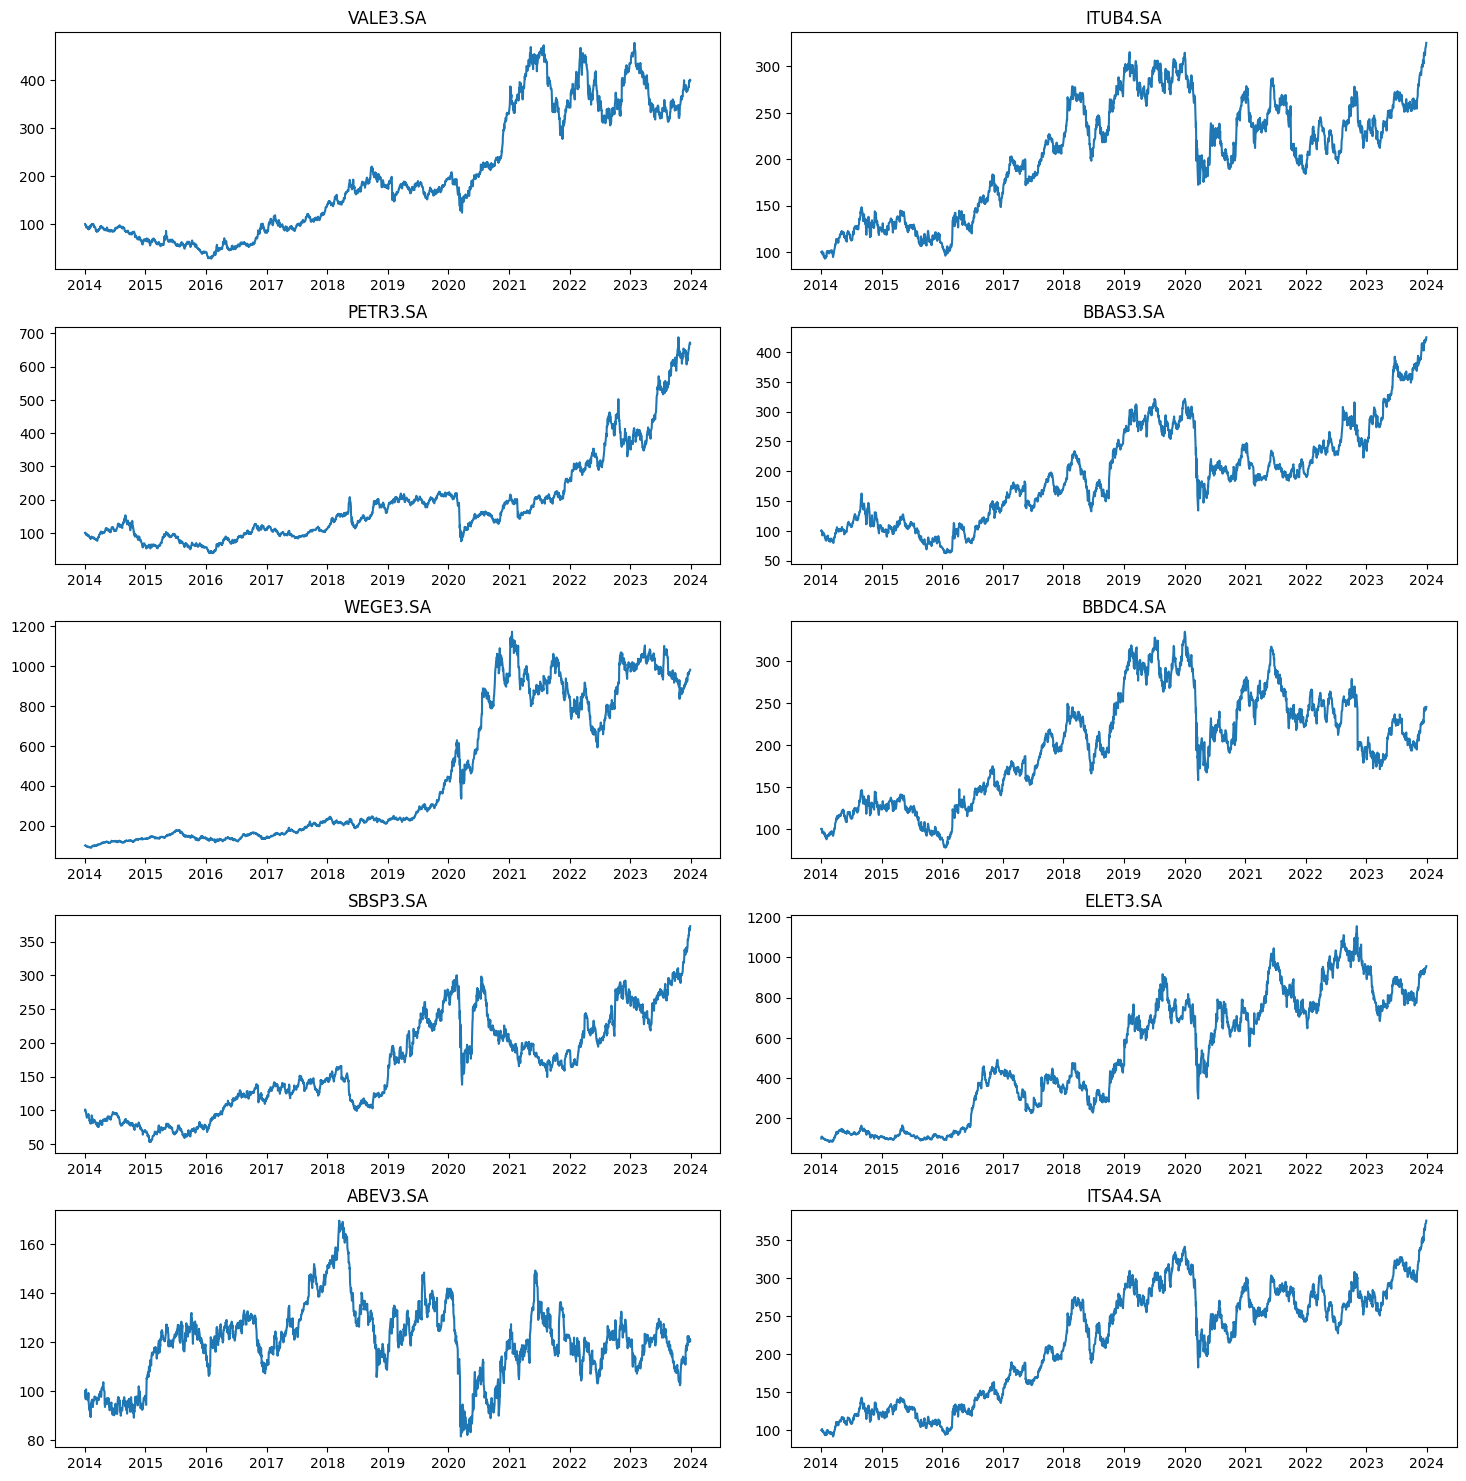

In [185]:
# View each asset perfomance
fig, axs = plt.subplots(5,2, figsize=(15,15))
fig.tight_layout(pad=2.0)

# Figs
for i, ax in enumerate(axs.flatten()):
    ax.plot(port_normalized[port_normalized.columns[i+1]])
    ax.set_title(str(port_normalized.columns[i+1]))

<Axes: xlabel='Date'>

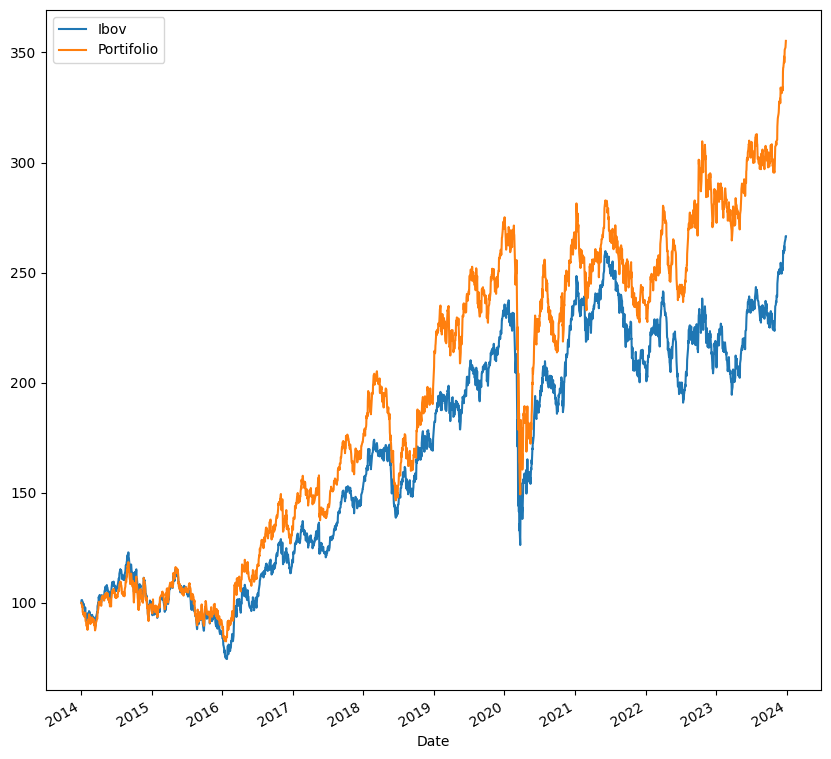

In [186]:
# Portifolio x Ibov
port_normalized[["Ibov", "Portifolio"]].plot(figsize=(10,10))

## (5) Future developments
top 5 gainers, top 5 losses, macroeconomic indicators, market news